#Step 1: Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd

# Load historic data
historic_data = pd.read_csv('/content/drive/MyDrive/DSW ML_Test/historic.csv')

# Load prediction input data
prediction_data = pd.read_csv('/content/drive/MyDrive/DSW ML_Test/prediction_input.csv')

#Understand the Data

In [58]:
# Display the first few rows of the historic data
print("Historic Data:")
print(historic_data.head())

# Display the first few rows of the prediction input data
print("\nPrediction Input Data:")
print(prediction_data.head())

# Display information about the datasets
print("\nInformation about Historic Data:")
print(historic_data.info())

print("\nInformation about Prediction Input Data:")
print(prediction_data.info())


Historic Data:
   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top

Prediction Input Data:
   item_no    category    main_promotion   color  stars
0   405901  Sweatshirt           Catalog    Blue    3.1
1   644275  Polo-Shirt  Frontpage_Header  Yellow    2.6
2   533070       Tunic           Catalog   Green    2.7
3   829436  Polo-Shirt           Catalog  Yellow    2.6
4   801722       Tunic           Catalog  Yellow    4.9

Information about Historic Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Co

#Check for Missing Values

In [59]:
# Check for missing values in historic data
print("\nMissing Values in Historic Data:")
print(historic_data.isnull().sum())

# Check for missing values in prediction input data
print("\nMissing Values in Prediction Input Data:")
print(prediction_data.isnull().sum())



Missing Values in Historic Data:
item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

Missing Values in Prediction Input Data:
item_no           0
category          0
main_promotion    0
color             0
stars             0
dtype: int64


There is no missing values

#Explore Numerical Features

In [60]:
# Summary statistics of numerical columns in historic data
print("\nSummary Statistics of Historic Data:")
print(historic_data.describe())

# Summary statistics of numerical columns in prediction input data
print("\nSummary Statistics of Prediction Input Data:")
print(prediction_data.describe())



Summary Statistics of Historic Data:
             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000

Summary Statistics of Prediction Input Data:
             item_no        stars
count    2000.000000  2000.000000
mean   541828.098000     3.476750
std    260971.444809     0.989345
min    100023.000000     0.700000
25%    308356.750000     2.800000
50%    541076.000000     3.500000
75%    773277.250000     4.200000
max    989050.000000     5.800000


The summary statistics reveal that both the historic and prediction input data consist of item numbers and corresponding star ratings, with similar mean star ratings of around 3.47, although the prediction input data has a slightly higher standard deviation at 0.989 compared to 0.979 for the historic data.

#Explore Categorical Features

In [61]:
# Distribution of categorical features in historic data
print("\nDistribution of Categories in Historic Data:")
print(historic_data['category'].value_counts())

print("\nDistribution of Main Promotions in Historic Data:")
print(historic_data['main_promotion'].value_counts())

print("\nDistribution of Colors in Historic Data:")
print(historic_data['color'].value_counts())

# Distribution of categorical features in prediction input data
print("\nDistribution of Categories in Prediction Input Data:")
print(prediction_data['category'].value_counts())

print("\nDistribution of Main Promotions in Prediction Input Data:")
print(prediction_data['main_promotion'].value_counts())

print("\nDistribution of Colors in Prediction Input Data:")
print(prediction_data['color'].value_counts())



Distribution of Categories in Historic Data:
Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

Distribution of Main Promotions in Historic Data:
Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

Distribution of Colors in Historic Data:
Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

Distribution of Categories in Prediction Input Data:
Polo-Shirt    392
T-Shirt       380
Tunic         374
Sweatshirt    351
Blouse        276
Hoodie        227
Name: category, dtype: int64

Distribution of Main Promotions in Prediction Input Data:
Category_Highlight     608
Catalog                579
Frontpage_Header       490
Display_Ad_Cam

The historic and prediction input data exhibit similar distributions across categories, main promotions, and colors, with categories like Tunic, Polo-Shirt, and T-Shirt being the most prevalent, followed by main promotions such as Category_Highlight and Catalog, and colors such as Multi-Color and Blue being the most common choices across both datasets.

There are 6 categories of product namely Tunic, Polo-Shirt, T-Shirt, Sweatshirt, Blouse, Hoodie Here as features datatype is categorical we have to convert it into numerical datatype in feature engineering as our model understand numerical values only

In [85]:
from sklearn.preprocessing import LabelEncoder    # here we encoded 6 product category into num using label encoder
le1 = LabelEncoder()
encoded_category1 = le1.fit_transform(historic_data['category'])
print(encoded_category1)

[5 1 3 ... 4 0 3]


In [87]:
historic_data['category'] = encoded_category1  # converting category in text to numbers

In [88]:
encoded_categories1 = le1.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [89]:
encoded_values1 = le1.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1)) # dictionary mapping the names to the numerical values
for category1, value1 in category_mapping1.items():
    print(f"Encoded Category: {category1}, Encoded Value: {value1}")  # encoded value with its original name

Encoded Category: Blouse, Encoded Value: 0
Encoded Category: Hoodie, Encoded Value: 1
Encoded Category: Polo-Shirt, Encoded Value: 2
Encoded Category: Sweatshirt, Encoded Value: 3
Encoded Category: T-Shirt, Encoded Value: 4
Encoded Category: Tunic, Encoded Value: 5


In [91]:
pd.crosstab(historic_data['category'], historic_data['success_indicator'])
# Based on biivariate analysis we can conclude
# here we can see the success indicator  of 'T-shirt' is huge among all categories which is good for buisness
# while  in relative sense polo-shirt went flop more compared to their sucess in marke

success_indicator,flop,top
category,,
0,363,883
1,258,481
2,817,729
3,453,907
4,271,1188
5,653,997


#Visualize the Data

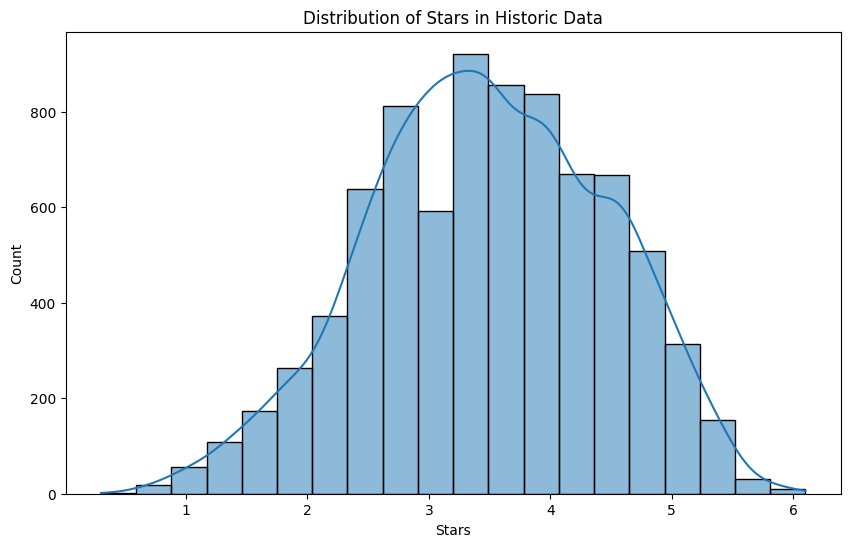

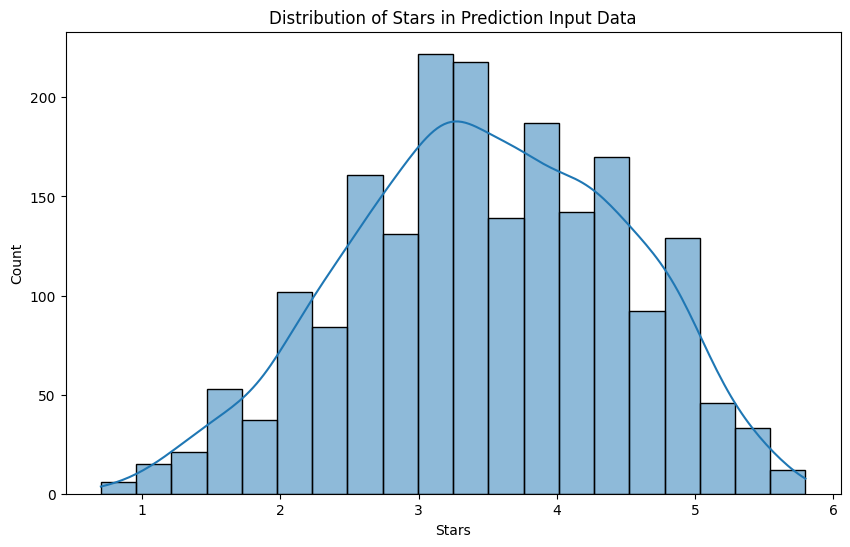

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of stars in historic data
plt.figure(figsize=(10, 6))
sns.histplot(historic_data['stars'], bins=20, kde=True)
plt.title('Distribution of Stars in Historic Data')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of stars in prediction input data
plt.figure(figsize=(10, 6))
sns.histplot(prediction_data['stars'], bins=20, kde=True)
plt.title('Distribution of Stars in Prediction Input Data')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


# Order of Category with their Star Ratings

<ipython-input-45-aa3d60bb2312>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_star_ratings_by_category.values, y=avg_star_ratings_by_category.index, palette='viridis')


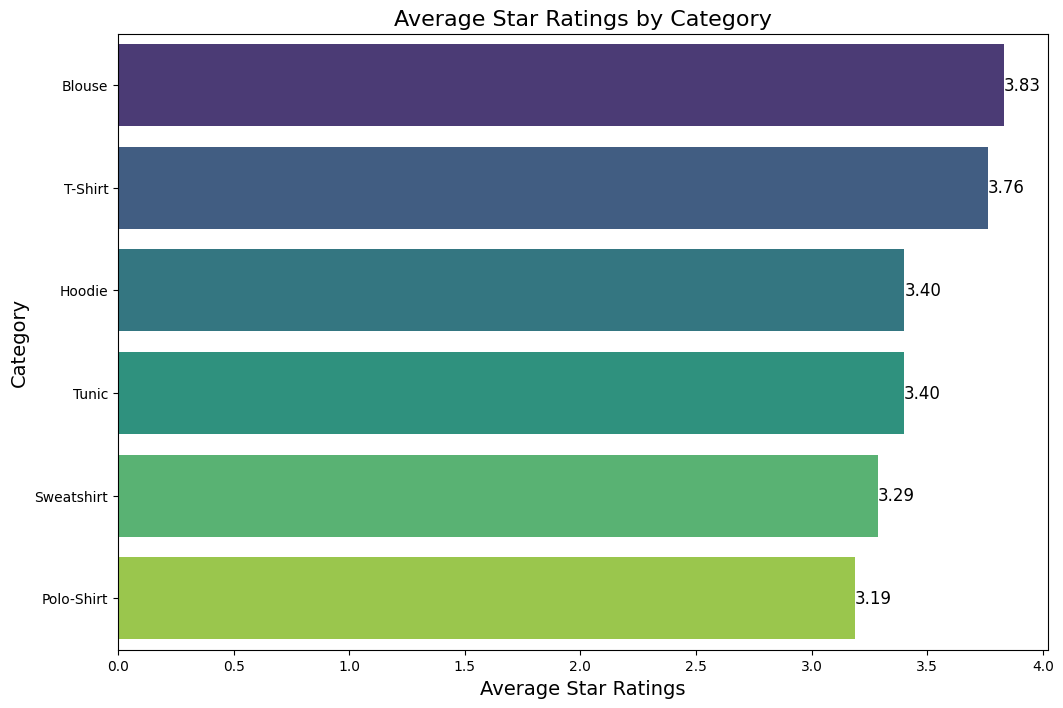

In [45]:
# Calculate average star ratings for each category
avg_star_ratings_by_category = df.groupby('category')['stars'].mean().sort_values(ascending=False)

# Plotting the categories with highest star ratings
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=avg_star_ratings_by_category.values, y=avg_star_ratings_by_category.index, palette='viridis')
plt.title('Average Star Ratings by Category', fontsize=16)
plt.xlabel('Average Star Ratings', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Add labels to the bars
for index, value in enumerate(avg_star_ratings_by_category.values):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12, color='black')

plt.show()

#Historic Data Analysis:

a. Category Column:

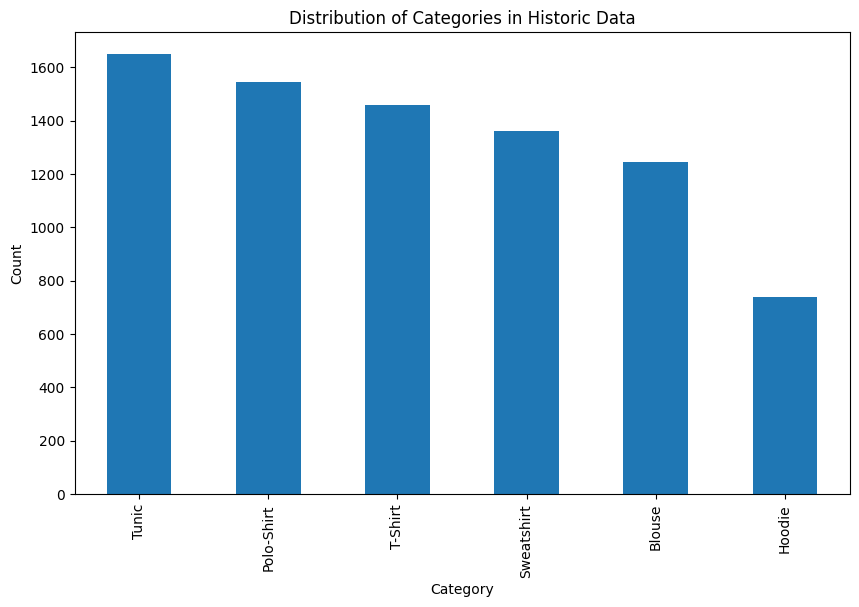

In [64]:
plt.figure(figsize=(10, 6))
historic_data['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories in Historic Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


From above graph it is understood that Tunic has the higest count in the datasets and Hoodie has the lowest count.

b. Main Promotion Column:

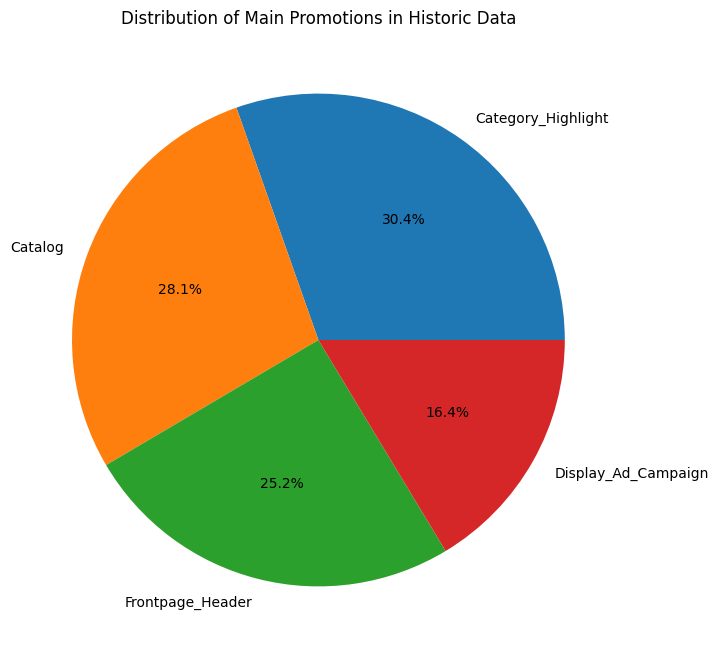

In [65]:
plt.figure(figsize=(8, 8))
historic_data['main_promotion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Main Promotions in Historic Data')
plt.ylabel('')
plt.show()


Percentage of distribution based upon promotions has been displayed

In [94]:
historic_data['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

Here for promotion of these product company used 4 mainways namely Category_Highlight, Catalog, Frontpage_Header, Display_Ad_Campaign

In [95]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le2 = LabelEncoder()
encoded_main_promotion = le2.fit_transform(historic_data['main_promotion'])
print(encoded_main_promotion)

[0 1 0 ... 1 1 2]


In [96]:
historic_data['main_promotion'] = encoded_main_promotion

In [97]:
encoded_categories_mp = le2.classes_
encoded_categories_mp

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [98]:
encoded_values2 = le2.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2)) # dictionary mapping the names to the numerical values
for mp, value2 in category_mapping2.items():
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")  # encoded value with its original name

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [100]:
# Bivarite of main_promotion and success_indicator feature
cross_tab2 = pd.crosstab(historic_data['main_promotion'], historic_data['success_indicator'])
cross_tab2

success_indicator,flop,top
main_promotion,,
0,953,1293
1,930,1502
2,335,974
3,597,1416


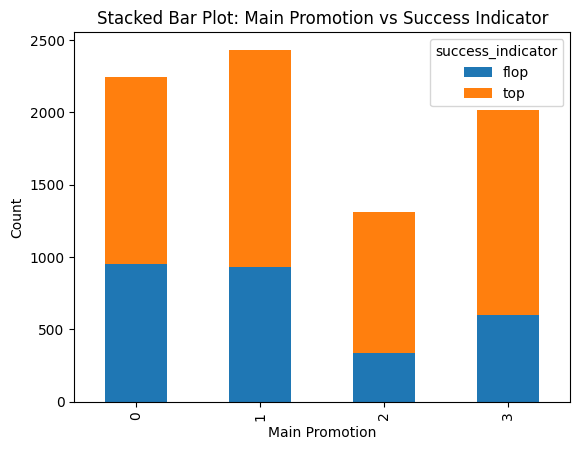

In [101]:
cross_tab2 = pd.crosstab(historic_data['main_promotion'], historic_data['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

c. Color Column:

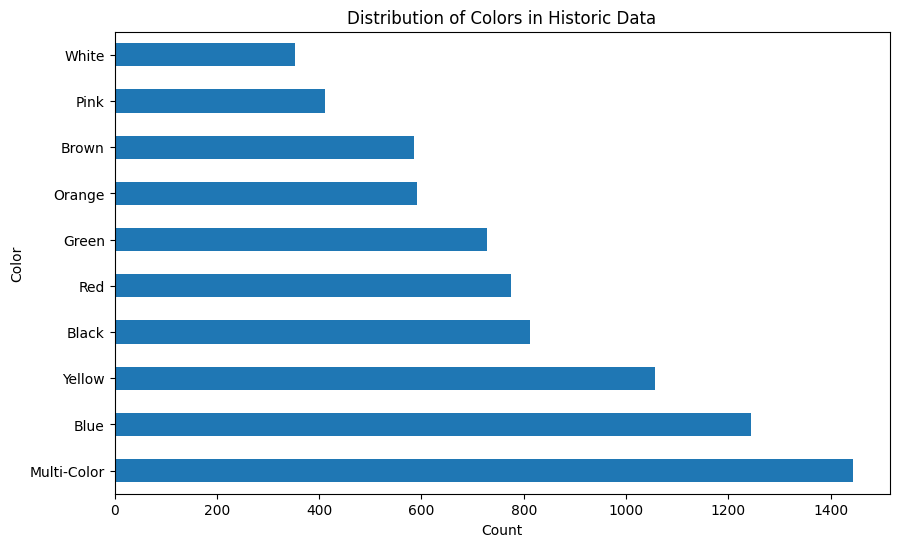

In [66]:
plt.figure(figsize=(10, 6))
historic_data['color'].value_counts().plot(kind='barh')
plt.title('Distribution of Colors in Historic Data')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()


In [102]:
historic_data['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

d. Stars Column:

In [103]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded color category into num using label encoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(historic_data['color'])
print(encoded_color)

[3 7 7 ... 9 1 1]


In [105]:
historic_data['color'] = encoded_color

In [106]:
encoded_color_class = le3.classes_
encoded_color_class

array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

In [107]:
encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3)) # dictionary mapping the names to the numerical values
for color, value3 in category_mapping3.items():
    print(f"Encoded Category: {color}, Encoded Value: {value3}")  # encoded value with its original name

Encoded Category: Black, Encoded Value: 0
Encoded Category: Blue, Encoded Value: 1
Encoded Category: Brown, Encoded Value: 2
Encoded Category: Green, Encoded Value: 3
Encoded Category: Multi-Color, Encoded Value: 4
Encoded Category: Orange, Encoded Value: 5
Encoded Category: Pink, Encoded Value: 6
Encoded Category: Red, Encoded Value: 7
Encoded Category: White, Encoded Value: 8
Encoded Category: Yellow, Encoded Value: 9


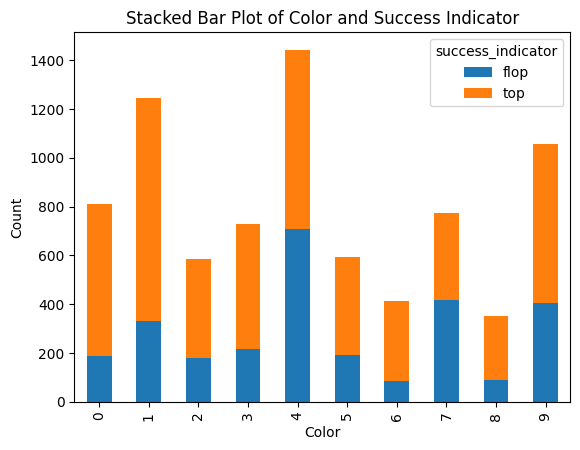

In [108]:
ct = pd.crosstab(df['color'], df['success_indicator'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

#Star Feature Analysis

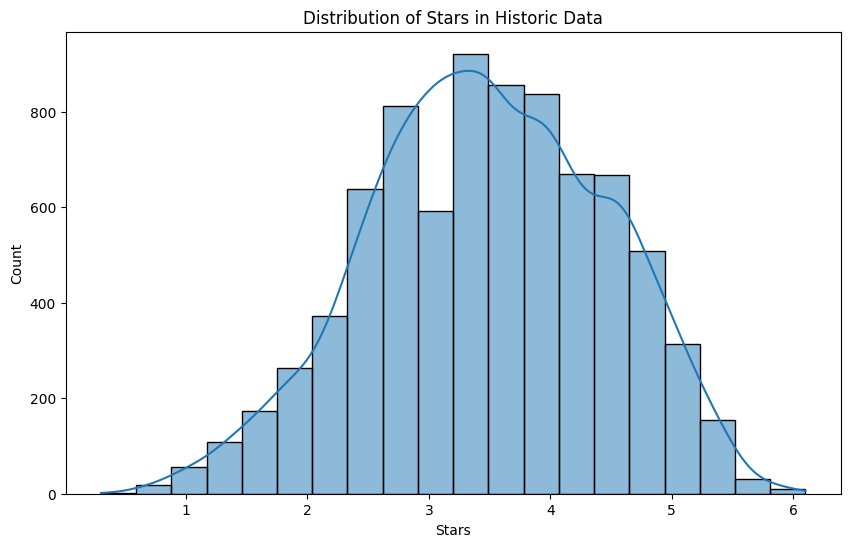

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(historic_data['stars'], bins=20, kde=True)
plt.title('Distribution of Stars in Historic Data')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


In [113]:
# Change data type of "Stars" from object to float
historic_data['stars'] = historic_data['stars'].astype(float)

In [114]:
historic_data['stars'] = np.where(df['stars'] <= 3, 0, df['stars'])
#BIN 1st where star <=3 will assign them as 0 as most of them are 'FLOP'

In [115]:
historic_data['stars'] = np.where(df['stars'] > 3, 1, df['stars'])
#BIN 2nd where star > 3 will assign them as 1 as most of them are 'TOP'

In [116]:
historic_data['stars'].value_counts()

1.0    5278
0.0    2722
Name: stars, dtype: int64

e. Success Indicator Column:

In [117]:
historic_data.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,5,0,3,1.0,flop
1,591846,1,1,7,0.0,flop
2,337574,3,0,7,1.0,top
3,401933,2,1,1,1.0,flop
4,812151,1,1,3,1.0,top


#Analysis on success_indicator

#Category vs success_indicator

From Above Graph it can be seen that Blouse category is getting the highest average star ratings and other category orders can be analysed


<Figure size 1200x800 with 0 Axes>

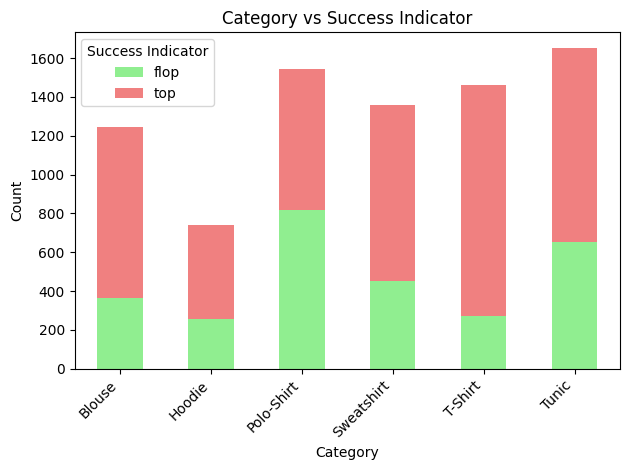

In [81]:
import matplotlib.pyplot as plt

# Group by category and success_indicator, and calculate counts
category_success_counts = historic_data.groupby(['category', 'success_indicator']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
category_success_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])

# Adding labels and title
plt.title('Category vs Success Indicator')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adding legend
plt.legend(title='Success Indicator')

plt.tight_layout()
plt.show()


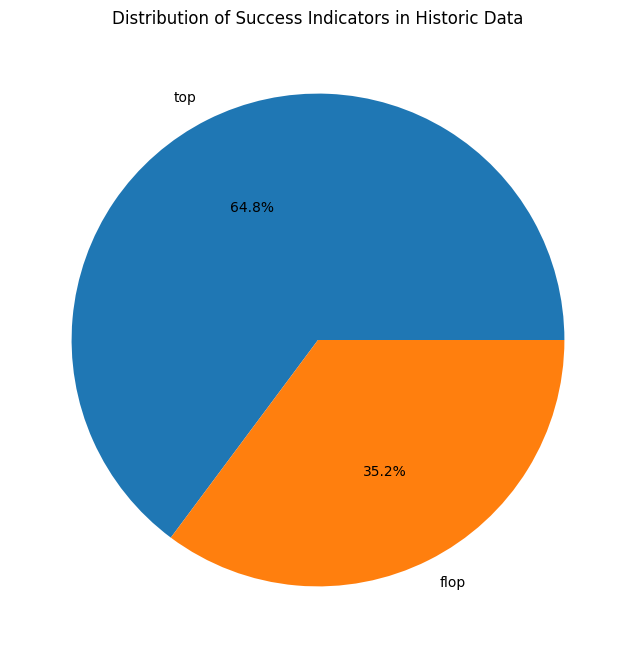

In [68]:
plt.figure(figsize=(8, 8))
historic_data['success_indicator'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Success Indicators in Historic Data')
plt.ylabel('')
plt.show()


In [118]:
historic_data['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [119]:
encoder = LabelEncoder()
historic_data['success_indicator'] = encoder.fit_transform(historic_data['success_indicator'])

In [120]:
historic_data['success_indicator'].value_counts() # will encoded new target column WHERE TOP = 1 and FLOP =0

1    5185
0    2815
Name: success_indicator, dtype: int64

#checking for Balancing and imbalancing of dataframe

In [122]:
historic_data['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [123]:
(2815/8000)*100  # 35% of data belongs to 'FLOP'/0 class

35.1875

In [124]:
(5185/8000)*100  # 65% of data belongs to 'TOP'/1 class

64.8125

1 >> Hence data is imbalanced as data for 'FLOP' catagory / class is nearly half of 'TOP' class / category in Target
feature. 2 >> Problem with imbalaced data is that when we prepare model , our prediction will be biased towards class/category with majority of data i.e, 'TOP' in our case 3 >> we can choose various ways of balancing data ex, undersampling of majority class , oversampling of minority class , or SMOTE technique

In [132]:
from imblearn.over_sampling import SMOTE
x = historic_data.drop('success_indicator', axis=1)
y = historic_data['success_indicator']

In [133]:
smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)
df_balanced = pd.concat([x_balanced, y_balanced], axis=1)
print(df_balanced)

       item_no  category  main_promotion  color  stars  success_indicator
0       739157         5               0      3    1.0                  0
1       591846         1               1      7    0.0                  0
2       337574         3               0      7    1.0                  1
3       401933         2               1      1    1.0                  0
4       812151         1               1      3    1.0                  1
...        ...       ...             ...    ...    ...                ...
10365   230384         0               2      4    0.0                  0
10366   856460         0               2      4    0.0                  0
10367   347392         4               0      4    0.0                  0
10368   287803         3               2      4    1.0                  0
10369   549331         2               0      6    0.0                  0

[10370 rows x 6 columns]


In [134]:
df_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

In [143]:
df_balanced.head()


,item_no,category,main_promotion,color,stars,success_indicator
0,739157,5,0,3,1.0,0
1,591846,1,1,7,0.0,0
2,337574,3,0,7,1.0,1
3,401933,2,1,1,1.0,0
4,812151,1,1,3,1.0,1


In [144]:
df_balanced.shape

(10370, 6)

In [145]:
df_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

Hence Our DATA is balanced with all values encoded in numbers which is prerequisite for the data required for model building

In [149]:
df_balanced.to_csv('train_df.csv',index=False)
# train_df will be our engineered training data suitable for chosen model

In [150]:
df_balanced

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,5,0,3,1.0,0
1,591846,1,1,7,0.0,0
2,337574,3,0,7,1.0,1
3,401933,2,1,1,1.0,0
4,812151,1,1,3,1.0,1
...,...,...,...,...,...,...
10365,230384,0,2,4,0.0,0
10366,856460,0,2,4,0.0,0
10367,347392,4,0,4,0.0,0
10368,287803,3,2,4,1.0,0
